# **Importing Libraries**

In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# **Loading and Visualizing Data**

In [12]:
corona_pd=pd.read_csv("../input/graduate-admissions/Admission_Predict_Ver1.1.csv")
corona_pd.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [13]:
#Returns the  meta data of the dataset.
corona_pd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [14]:
#Returns the information like mean,max,min,etc., of the dataset.
corona_pd.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [15]:
#To remove the columns of the DataFrame in memory.
corona_pd.drop(["Serial No.","Chance of Admit "],axis=1,inplace=True)
corona_pd.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,337,118,4,4.5,4.5,9.65,1
1,324,107,4,4.0,4.5,8.87,1
2,316,104,3,3.0,3.5,8.00,1
3,322,110,3,3.5,2.5,8.67,1
4,314,103,2,2.0,3.0,8.21,0


In [16]:
#Returns the sum of null values under each column.
corona_pd.isnull().sum()

GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
dtype: int64

In [17]:
#To check whether the row contains duplicate values or not.
corona_pd.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
495    False
496    False
497    False
498    False
499    False
Length: 500, dtype: bool

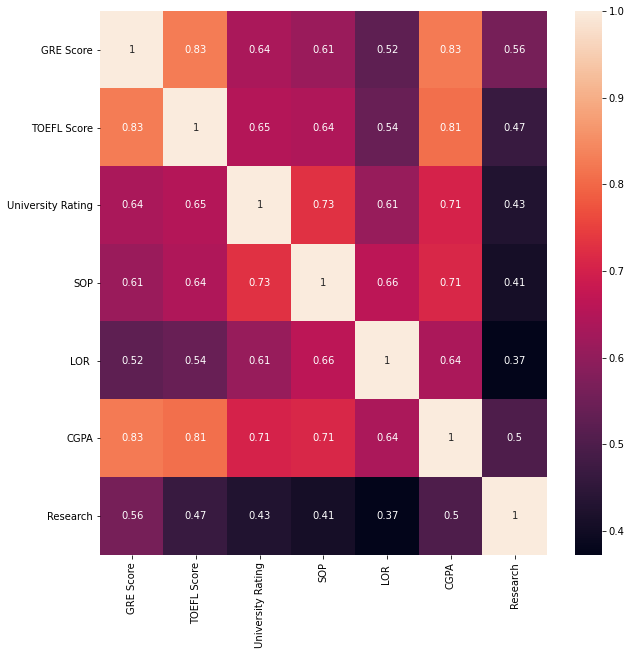

In [18]:
#To plot a correlation matrix between features.
f,ax= plt.subplots(figsize=(10,10))
sns.heatmap(corona_pd.corr(),annot=True)

You can see from the above visualization that each feature has a effect on every other features.

# **Elbow Method**
Used to find optimal number of clusters.

In [19]:
#To scale the values along columns.
scaler= StandardScaler()
corona_pd_scaled=scaler.fit_transform(corona_pd)

In [20]:
#To get the Within Cluster Sum of Squares(WCSS) for each cluster count to find the optimal K value(i.e cluster count).
scores=[]
for i in range(1,20):
    corona_means=KMeans(n_clusters=i)
    corona_means.fit(corona_pd_scaled)
    scores.append(corona_means.inertia_)

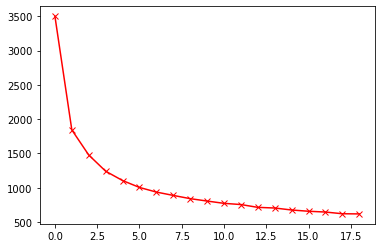

In [21]:
#Plotting the values obtained to get the optimal K-value.
plt.plot(scores,"-rx")

At point 3 ,the graph looks like a elbow. So we choose this as our K value.

# **K-MEANS Implementation**

In [35]:
#Applying K-means algorithm with the obtained K value.
corona_means=KMeans(n_clusters=3)
corona_means.fit(corona_pd_scaled)

KMeans(n_clusters=3)

In [36]:
#Returns an array with cluster labels to which it belongs.
labels=corona_means.labels_

In [37]:
#Creating a Dataframe with cluster centres(The example which is taken as center for each cluster)-If you are not familiar ,learn about k-means through the link given at last.
corona_pd_m=pd.DataFrame(corona_means.cluster_centers_,columns=corona_pd.columns)
corona_pd_m.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,-0.900894,-0.897014,-0.819859,-0.901825,-0.779384,-0.928327,-0.716576
1,1.159804,1.174945,1.175360,1.085662,0.971192,1.237152,0.743641
2,0.108402,0.094260,0.017236,0.159680,0.115637,0.083158,0.207704


In [38]:
#Inverting the scaled values to original values to get a better view.
corona_cluster=scaler.inverse_transform(corona_pd_m)
corona_cluster=pd.DataFrame(corona_cluster,columns=corona_pd.columns)
corona_cluster.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,306.306452,101.741935,2.177419,2.481183,2.763441,8.015538,0.204301
1,329.559055,114.330709,4.456693,4.448819,4.381890,9.323937,0.929134
2,317.695187,107.764706,3.133690,3.532086,3.590909,8.626684,0.663102


It's clear from the above table that the students at cluster 1 will get the admission for sure , the students at cluster 2 have intermediate chance of getting admission and the students at cluster 0 have almost no chance of getting admission.

In [39]:
#Concatenating the cluster labels.
corona_cluster=pd.concat([corona_pd,pd.DataFrame({"Cluster":labels})],axis=1)
corona_cluster.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Cluster
0,337,118,4,4.5,4.5,9.65,1,1
1,324,107,4,4.0,4.5,8.87,1,1
2,316,104,3,3.0,3.5,8.00,1,2
3,322,110,3,3.5,2.5,8.67,1,2
4,314,103,2,2.0,3.0,8.21,0,0


# **Principal Component Analysis (PCA)**
Used to perform dimentionality reduction to have a better view of clusters of examples.

In [40]:
#Implementing pca with 3 components i.e 3d plot
corona_pca=PCA(n_components=3)
principal_comp=corona_pca.fit_transform(corona_pd_scaled)

In [41]:
principal_comp=pd.DataFrame(principal_comp,columns=['pca1','pca2','pca3'])
principal_comp.head()

,pca1,pca2,pca3
0,-3.568375,-0.328318,-0.608675
1,-1.639199,0.034550,0.867234
2,0.550991,-0.720794,0.940014
3,-0.345470,-1.280237,-0.390081
4,2.035804,0.039366,-0.691749


In [42]:
principal_comp=pd.concat([principal_comp,pd.DataFrame({"Cluster":labels})],axis=1)

In [43]:
principal_comp.sample(5)

,pca1,pca2,pca3,Cluster
158,2.360394,-0.049380,-0.885633,0
121,-3.744267,-0.050691,-0.439084,1
100,-0.376543,-0.759486,0.423678,2
59,2.389873,-0.368935,-1.209505,0
412,1.260123,-1.278686,0.444141,0


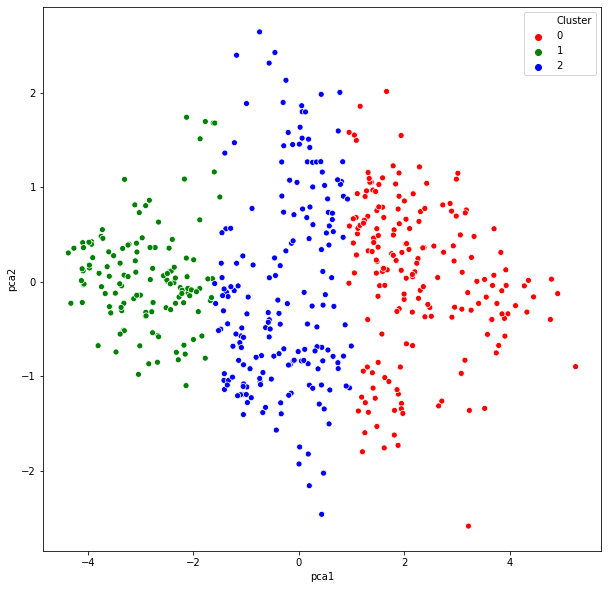

In [57]:
#Plotting the 2d-plot.
plt.figure(figsize=(10,10))
ax=sns.scatterplot(x='pca1',y='pca2',hue="Cluster",data=principal_comp ,palette=['red','green','blue'])
plt.show()

You can understand the same from the above visualization which I mentioned earlier.

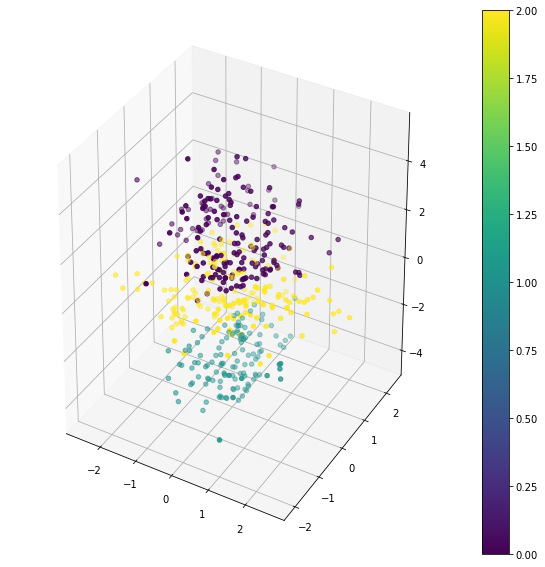

In [55]:
#Plotting the 3d-plot
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
sc=ax.scatter(xs=principal_comp['pca2'],ys=principal_comp['pca3'],zs=principal_comp['pca1'],c=principal_comp['Cluster'],marker='o')
plt.colorbar(sc)
plt.show()

You can have a even better view from the above plot.

For K-Means algorithm - Refer this [link](https://www.google.com/url?sa=t&rct=j&q=&esrc=s&source=web&cd=&cad=rja&uact=8&ved=2ahUKEwiInYrt2cDqAhUbyzgGHaiTBHAQwqsBMAF6BAgKEAQ&url=https%3A%2F%2Fwww.youtube.com%2Fwatch%3Fv%3DhDmNF9JG3lo&usg=AOvVaw0uqMZBuHXA-UDOHz-ymSfK)

For PCA - Refer this [link](https://www.google.com/url?sa=t&rct=j&q=&esrc=s&source=web&cd=&cad=rja&uact=8&ved=2ahUKEwjB1NOK28DqAhUjguYKHUNxDxwQwqsBMAB6BAgKEAQ&url=https%3A%2F%2Fwww.youtube.com%2Fwatch%3Fv%3Drng04VJxUt4&usg=AOvVaw14_fwoAfo-0sWFezc-7qiy)

Thank You!